In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv('C:/Users/Kiran Shankar Bhat/Documents/DATA/data/BankNote_Authentication.csv')

In [3]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
data.size

6860

In [5]:
data.shape

(1372, 5)

In [7]:
x = data.drop('class',axis=1)
y = data['class']

## Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_x = scale.fit_transform(x)

In [13]:
scaled_x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [14]:
train_data = pd.DataFrame(scaled_x , columns=x.columns)

In [15]:
train_data

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


## Sampling the data

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

In [67]:
x_train.shape, y_train.shape

((1097, 4), (1097,))

In [68]:
x_test.shape, y_test.shape

((275, 4), (275,))

## Creating the model

In [69]:
model=Sequential()

In [70]:
model.add(Dense(8, activation = 'relu', input_shape=(x_train.shape[1],)))
model.add(Dense(10,activation= 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [71]:
from tensorflow.keras.optimizers import Adam , SGD , RMSprop

In [72]:
adam = Adam(0.001)

### Compling the model

In [73]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [74]:
predict = model.fit(x_train, y_train,
               validation_split=0.2,
               batch_size=10,
               epochs=50,
               verbose=1)

Epoch 1/50
88/88 [==============================] - 0s 3ms/step - loss: 0.7986 - accuracy: 0.6887 - val_loss: 0.5360 - val_accuracy: 0.7455
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8084 - val_loss: 0.2675 - val_accuracy: 0.9045
Epoch 3/50
88/88 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.9453 - val_loss: 0.1739 - val_accuracy: 0.9773
Epoch 4/50
88/88 [==============================] - 0s 1ms/step - loss: 0.1636 - accuracy: 0.9761 - val_loss: 0.1315 - val_accuracy: 0.9773
Epoch 5/50
88/88 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9818 - val_loss: 0.1008 - val_accuracy: 0.9864
Epoch 6/50
88/88 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 0.9863 - val_loss: 0.0759 - val_accuracy: 0.9864
Epoch 7/50
88/88 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9886 - val_loss: 0.0579 - val_accuracy: 0.9909
Epoch 8/50
88/88 [==

In [75]:
model.layers[1].get_weights()

[array([[-0.04724301,  0.309816  ,  0.8981368 ,  0.5163417 ,  0.03458348,
          0.36471274,  0.368842  , -0.14771679, -0.27780902, -0.6846108 ],
        [ 0.6308131 , -0.01494843,  0.41260868,  0.5879634 , -0.06357919,
          0.51273054,  0.6068627 , -0.1505978 ,  0.50214314,  0.5756253 ],
        [-0.19969529,  0.9557491 , -0.26984727, -0.11391623, -0.00779163,
          0.75428534, -0.7667793 , -0.5543335 ,  0.85597587, -0.0155809 ],
        [-0.01442973, -0.04115819,  0.50819093,  0.27732816,  0.11532605,
         -0.5512107 , -0.08533604,  0.3887096 , -0.43726575, -0.1576765 ],
        [ 0.01603674,  0.65730745, -0.9118087 , -0.6745232 , -0.41376674,
          0.04091757, -1.0762527 , -0.4933205 ,  1.088303  , -0.05459661],
        [-0.2866377 , -0.11949917,  0.28621072,  0.6733228 , -0.19379511,
          0.23837312,  0.7735983 , -0.6447968 ,  0.04583178, -0.5934643 ],
        [ 0.04064487,  0.46337378,  0.12271423, -0.3258934 ,  0.13264826,
         -0.64715976, -0.2240425

In [76]:
y_predict = model.predict(x_test)

In [77]:
y_predict

array([[1.34545292e-10],
       [9.99304652e-03],
       [2.03830859e-05],
       [6.99205263e-16],
       [1.20907277e-11],
       [2.35597895e-06],
       [1.37434675e-10],
       [1.46196916e-10],
       [2.16633381e-07],
       [5.28156685e-11],
       [9.99758244e-01],
       [9.99998927e-01],
       [5.37790257e-08],
       [9.99888301e-01],
       [6.04713790e-08],
       [9.99617875e-01],
       [9.99950647e-01],
       [9.99891043e-01],
       [9.99999642e-01],
       [9.99873519e-01],
       [1.28145346e-12],
       [1.17756871e-08],
       [9.99989986e-01],
       [4.73562541e-13],
       [9.99878049e-01],
       [3.21121393e-11],
       [4.02428931e-13],
       [9.99984741e-01],
       [1.89703484e-17],
       [5.61921784e-15],
       [1.00000000e+00],
       [2.05998347e-08],
       [1.77997094e-06],
       [9.98186707e-01],
       [9.99915600e-01],
       [2.54079987e-13],
       [9.99189377e-01],
       [9.94449973e-01],
       [9.99996901e-01],
       [2.34945730e-09],


In [78]:
y_pre = []
for i in y_predict:
    if i <0.5:
        y_pre.append(0)
    else:
        y_pre.append(1)

In [79]:
y_pre

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pre)

array([[148,   0],
       [  0, 127]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Text(0.5, 0, 'epoch')

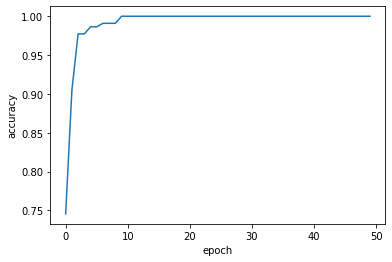

In [83]:
plt.plot(predict.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

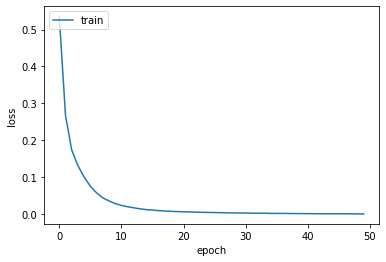

In [86]:
plt.plot(predict.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.savefig('loss vs epoch')